### Fitting Modified Gaussian Distribution

We want to take two given percentile values (e.g. the median value (50th percentile) is at 1000m), and use these to create a modified normal distribution to use for our accessability impedance function.

This will be done numerically, as a gaussian function cannot be integrated, by testing an equal area constant and gaussian component, and then adjusting until a result within a given threshold of desired is reached.

In [7]:
import numpy as np

The modified Gaussian function to be fit is:

\begin{align}
    f(x) = 1,  t_{ij} <= a\\
    f(x) = e^{-\frac{(t_{ij} -a)^2}{b^2}}, t_{ij} >= a\\
\end{align}

In [8]:
def impedance_function(x, a=1, b=1):
    '''Define the impedance function mathematically'''
    
    if x <= a:
        f = 1
    else:
        f = np.exp((-(x-a)**2)/b**2)
    
    return f

In [9]:
def norm_impedance_function(x, a=1, b=1):
    '''Defines a normalised impedance function, which can be used with probabilitic values.
    '''
    # find the overall area of the curve
    tot_area = a + 0.5*b*np.sqrt(np.pi)
    
    #evaluate the function at the given point
    f = impedance_function(x, a=a, b=b)
    
    #find the normalised function
    nf = f/tot_area
    
    return nf

In [10]:
## not needed

def find_mg_parameters(input_percentile1, value1, input_percentile2, value2, tolerance):
    '''Finds the modified gaussian parameters a and b to match the given values within a given tolerance
    Inputs: input_percentilex - one of the percentile input values
            valuex - the value at the given percentile
    '''
    
    #define intitial a and b values and errors to ensure the start of the loop
    a = 1000
    b = 200
    
    error1 = 1000
    error2 = 1000
    
    trial_count = 0 # keep a count of the number of trials
    
    while abs(error1) > tolerance or abs(error2) > 1: #while either of the error values are greater than the tolerance

        
        #adjust the a and b values
        
        #everytime the 
        if (error1 > tolerance) or (error1 > tolerance):
        
        
        
        
        #find the percentile with these given values
        
        
    
    
        trial_count += 1
    
    

IndentationError: expected an indented block (3781541130.py, line 34)

In [11]:
def area_of_impedance(lower_bound, upper_bound, dt, a = 1000, b = 200):
    '''find the Rhieman integral of the impedance function, with a given resolution'''
    
    area = 0 #initialise the area
    
    no_t_values =int((upper_bound-lower_bound) / dt)
    
    for t in np.linspace(lower_bound, upper_bound-dt, no_t_values): #-dt gives left side rhiemman integration
        
        impedance_value = impedance_function(t, a=a, b=b) #find the height of the current rectangle
        
        area+= impedance_value*dt #add the rectangle to the overall area
        
    return area
    

In [12]:
def impedance_percentile(value, dt, a = 1000, b = 200):
    '''Finds the corresponding percentile value of a given input t value, for the given impedance function parameters'''
    
     # find the overall area of the curve
    tot_area = a + 0.5*b*np.sqrt(np.pi)
        
    #find the area up to the percentile
    area = area_of_impedance(0, value, dt, a=a, b=b) #have set dt to 0.1, could be changed
    
    #give the corresponding percentile
    percentile = area/tot_area
    
    return percentile

In [76]:
def impedance_percentile_fit(xdata, a, b):
    '''Impendance percentile function, but for use within the scipy optimise curve_fit function. Assumes a dt value of
    0.1'''
    
    fdata = []
    
    for value in xdata:
        fdata.append(impedance_percentile(value, 0.1, a = a, b = b)) #have set dt to 0.1, change here
    
    return fdata

In [14]:
area_of_impedance(0,10,0.01)

9.999999999999831

In [15]:
np.linspace(0,100,int(100/0.1 +1))

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [16]:
impedance_function(2, a=1000, b=200)

1

In [17]:

impedance_percentile(801, 0.1, a = 1000, b = 700)

0.4943349438177112

In [18]:
impedance_function(700, a=400, b=360)

0.4993517885992762

### Testing

In [277]:
test_values(0, 10.51006, 5, 10) # b = 10.51 gives a curve with 50% area on either side of a point 5 along from a 

5 :  0.5000001681308144
10 :  0.8247528340827855


In [39]:
def test_values(a, b, value1, value2):
    '''Gives the resulting percentiles at the given values, for a given a and b
    '''
    
    
    print(value1, ": ", impedance_percentile(value1, 0.1, a = a, b = b))
    print(value2, ": ", impedance_percentile(value2, 0.1, a = a, b = b))

### Plotting

In [21]:
import matplotlib.pyplot as plt

In [301]:
values = []
scale = 25
t_values = np.linspace(0,scale,int(scale/0.1 + 1))
for t in np.linspace(0,scale,int(scale/0.1 + 1)):
    values.append(impedance_function(t, a=5, b=5.642)) 

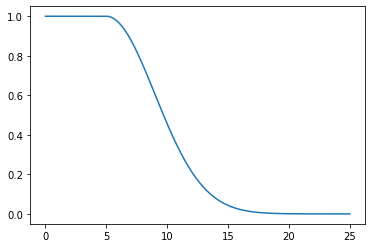

In [302]:
plt.plot(t_values, values)

### Optimising using scipy

In [23]:
import scipy
import scipy.optimize

In [24]:
#the xdata corresponds to the walking distances, and the ydata the corresponding percentiles
xdata = [801,1789]
ydata = [0.5, 0.85]

In [26]:
#this gives the values of a and b needed
scipy.optimize.curve_fit(impedance_percentile_fit, xdata, ydata, bounds = ([0, 0], [1e9, 1e9]))

array([1.44131190e-08, 1.71570899e+03])

In [196]:
def optimise_impedance_curve(xdata, ydata):
    '''Runs SciPy optimisation, to return the parameters and b to use within the function'''
    a, b = scipy.optimize.curve_fit(impedance_percentile_fit, xdata, ydata)[0]#, bounds = ([0, 0], [1e9, 1e9]))[0]
    return a, b

In [197]:
optimise_impedance_curve([801,1789], [0.5, 0.85])

(-658.3072006470652, 2156.0369425561125)

In [275]:
optimise_impedance_curve([5,9], [0.5, 0.85])

(5.314589434101094, 5.2869196718495175)

In [299]:
0.5 * 5.642*np.sqrt(np.pi)+5

10.000092313404462

In [300]:
test_values(5, 5.642, 5, 10)

5 :  0.49999538437238517
10 :  0.8976574003631618


In [295]:
test_values(0, 5.65, 0, 5)

0 :  0.0
5 :  0.7946526042247278


In [296]:
5*1.128

5.64